In [17]:
import pandas as pd
import seaborn as sns
import json
import re
import requests
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# zh_font_path = '/usr/share/fonts/chinese/仿宋_GB2312.ttf'
# zh_font = fm.FontProperties(fname=zh_font_path)
# plt.rcParams['font.family'] = zh_font.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [18]:
# df = pd.read_excel("20241018 第一批测试小数据（1w）.xlsx")
df = pd.DataFrame()
for i in range(1, 4):
    tmp_df = pd.read_excel("E:/小论文/小论文2/数据/20241111 123大类原始数据.xlsx", sheet_name=f"第{i}大类")
    df = pd.concat([df, tmp_df])
df.shape

(29831, 12)

In [48]:
df.head(2)

,大类代码,大类名称,中类代码,中类名称,小类代码,小类名称,细类代码,细类名称,GTIN,产品名称,产品描述,Unnamed: 11
0,1000000,基本生活保障物资,1010000,粮食,1010100,面粉,1010100,面粉,6971476210146,伊古道雪花小麦粉,雪花小麦粉,NaN
1,1000000,基本生活保障物资,1010000,粮食,1010100,面粉,1010100,面粉,06973407240048,永海生粉,生粉,NaN


In [49]:
df.drop(columns=['GTIN'], inplace=True)
df.head(3)

,大类代码,大类名称,中类代码,中类名称,小类代码,小类名称,细类代码,细类名称,产品名称,产品描述,Unnamed: 11
0,1000000,基本生活保障物资,1010000,粮食,1010100,面粉,1010100,面粉,伊古道雪花小麦粉,雪花小麦粉,NaN
1,1000000,基本生活保障物资,1010000,粮食,1010100,面粉,1010100,面粉,永海生粉,生粉,NaN
2,1000000,基本生活保障物资,1010000,粮食,1010100,面粉,1010100,面粉,永海生粉,生粉,NaN


In [50]:
df['产品名称'].isnull().value_counts()

产品名称
False    29719
True       112
Name: count, dtype: int64

In [51]:
df = df.dropna(subset=['产品名称'])
df['细类名称'].fillna('其他类别', inplace=True)
df.shape

/tmp/ipykernel_12103/412092851.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['细类名称'].fillna('其他类别', inplace=True)


(29719, 11)

In [52]:
df['细类名称'].isnull().value_counts()

细类名称
False    29719
Name: count, dtype: int64

In [53]:
df['大类名称'].nunique()

3

In [54]:
df['中类名称'].unique().tolist()

['粮食',
 '蔬菜',
 '水果',
 '坚果',
 '禽蛋',
 '食用盐',
 '食用油',
 '食糖',
 '肉类',
 '加工食品',
 '纺织产品',
 '救灾帐篷',
 '日用品',
 '简易厕所',
 '个人防护装备',
 '搜救设备',
 '医疗及防疫设备及常用应急药品',
 '应急运输与专用作业交通设备',
 '工程机械设备',
 '能源动力设备及物资',
 '应急照明设备及用品',
 '洗消器材及设备',
 '后勤支援装备',
 '非动力手工工具',
 '灭火及爆炸物处置设备',
 '拦污封堵器材装备',
 '泵类及通风排烟设备',
 '安防及反恐防暴装备',
 '分析检测类设备',
 '监测预警仪器和装置',
 '通信设备',
 '雷达、无线电导航及无线电遥控设备',
 '广播电视设备',
 '信号标识类器材',
 '信息技术设备',
 '工程材料',
 '机械加工设备']

In [55]:
df['小类名称'].unique().tolist()

['面粉',
 '大米',
 '玉米',
 '大豆',
 '新鲜蔬菜',
 '冷冻蔬菜',
 '腌渍菜',
 '脱水蔬菜',
 '新鲜水果',
 '冷冻水果',
 '干制水果',
 '花生',
 '其他坚果',
 '鸡蛋',
 '其他禽蛋',
 '加碘盐',
 '其他食用盐',
 '食用植物油',
 '食用动物油脂',
 '成品糖',
 '加工糖',
 '家畜肉',
 '家禽肉',
 '其他肉类',
 '方便食品',
 '乳制品',
 '婴幼儿食品',
 '饮料',
 '水产加工品',
 '服装类',
 '床上用织物制品',
 '安全用织物制品',
 '单帐篷',
 '高原 、高寒帐篷',
 '厕所帐篷',
 '烹调和加热装置',
 '家用制冷电器具',
 '温度调节用品',
 '生活热水设备',
 '储水用具',
 '雨具',
 '卫生清洁用品',
 '桌椅',
 '缝纫材料及用品',
 '废弃物清扫及收集工具',
 '防蚊虫用品',
 '多功能刀具',
 '婴幼儿用品',
 '移动式简易厕所',
 '固定式简易厕所',
 '其他简易厕所',
 '呼吸防护装备',
 '躯体防护装备',
 '头部防护装备',
 '眼面部防护装备',
 '耳部防护装备',
 '手部防护装备',
 '足部防护装备',
 '坠落防护装备',
 '个人防护套件装备',
 '生命探测设备',
 '破拆工具',
 '降落与登乘/登高设备',
 '救捞设备',
 '医疗携行急救设备',
 '手术器械',
 '诊断设备',
 '消毒供应设备',
 '检验设备',
 '防疫卫生设备及药品',
 '医用耗材',
 '医疗模块化装备',
 '兽医器械及兽用药',
 '托盘',
 '应急机动车辆',
 '应急船舶设备',
 '应急航空设备',
 '非机动车辆',
 '应急通行辅助装备',
 '冲锋舟',
 '破冰除雪设备及器材',
 '挖掘推铲类设备',
 '起重机械',
 '桩工堵口设备',
 '喷灌设备',
 '机器人成套系统',
 '疏堵清淤类设备',
 '电池',
 '应急发电设备',
 '柴/汽油发动机',
 '电动机',
 '液压/气压动力设备',
 '燃料及气源',
 '佩戴式照明设备',
 '手持式照明设备',
 '移动式照明设备',
 '车载/船载照明设备',
 '非电照明用品',
 '

In [56]:
df['细类名称'].nunique()

676

In [57]:
import requests
import json
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

def gen_prompt(df1, name, goods, parent_name=None):
    refer_content = ""
    category_list = df1[name].unique().tolist()
    if parent_name:
        if name == '小类名称':
            category_list = df1[df1['中类名称']==parent_name][name].unique().tolist()
        elif name == '细类名称':
            category_list = df1[df1['小类名称']==parent_name][name].unique().tolist()
    df = df1.dropna(subset=['产品名称'])
    for i in category_list:
        c1, c2 = df[df[name]==i].iloc[0]['产品名称'], df[df[name]==i].iloc[-1]['产品名称']
        if name == "小类名称":
            c1, c2 = df[(df[name]==i)&(df['中类名称']==parent_name)].iloc[0]['产品名称'], df[(df[name]==i)&(df['中类名称']==parent_name)].iloc[0]['产品名称']
        elif name == "细类名称":
            c1, c2 = df[(df[name]==i)&(df['小类名称']==parent_name)].iloc[0]['产品名称'], df[(df[name]==i)&(df['小类名称']==parent_name)].iloc[0]['产品名称']
        refer_content += f"- {i}：{c1.replace("...", "").strip()}、{c2.replace("...", "").strip()}\n"
    
    category_list = [x.replace("...", "").strip() for x in category_list]
    goods = goods.replace("...", "").strip()
    prompt = f"""请根据我提供的商品类别列表 {category_list}，对“{goods}”进行准确分类。为了帮助你更好地理解分类标准，以下是每个类别的示例商品：

{refer_content}

请仅返回“{goods}”对应的商品类别，不要输出任何多余信息。"""

    return prompt


def request_model(df, name, goods, model_name="Qwen2.5-7B-Instruct"):
    url = "http://localhost:9858/v1/chat/completions"

    headers = {
        "Content-Type": "application/json"
    }

    system_prompt = ""
    data = {
        "model": model_name,
        "messages": [
            {
                "role": "user",
                "content": gen_prompt(df, name, goods)
            }
        ],
        "max_tokens": 1000,
        "temperature": 0
    }
    response = requests.post(url, headers=headers, data=json.dumps(data), timeout=600)
    return response.json()['choices'][0]['message']['content']

print(gen_prompt(df, '中类名称', '信息安全设备'))

请根据我提供的商品类别列表 ['粮食', '蔬菜', '水果', '坚果', '禽蛋', '食用盐', '食用油', '食糖', '肉类', '加工食品', '纺织产品', '救灾帐篷', '日用品', '简易厕所', '个人防护装备', '搜救设备', '医疗及防疫设备及常用应急药品', '应急运输与专用作业交通设备', '工程机械设备', '能源动力设备及物资', '应急照明设备及用品', '洗消器材及设备', '后勤支援装备', '非动力手工工具', '灭火及爆炸物处置设备', '拦污封堵器材装备', '泵类及通风排烟设备', '安防及反恐防暴装备', '分析检测类设备', '监测预警仪器和装置', '通信设备', '雷达、无线电导航及无线电遥控设备', '广播电视设备', '信号标识类器材', '信息技术设备', '工程材料', '机械加工设备']，对“信息安全设备”进行准确分类。为了帮助你更好地理解分类标准，以下是每个类别的示例商品：

- 粮食：伊古道雪花小麦粉、三稻粱有机大豆
- 蔬菜：君和秀珍菇、金碧海碧海紫菜
- 水果：长武红17°24枚实惠装苹果、雪梅海乡芒果条
- 坚果：华盛老做坊裹衣花生、刻凡蒜香味青豆
- 禽蛋：欣欣农场杂粮土鸡蛋、洁龍酱汁味鹌鹑蛋
- 食用盐：三花加碘精制盐、中盐天山精纯盐
- 食用油：麦油郎非转基因一级大豆油、龙江和牛牛油
- 食糖：皓运莱绵白糖、红塘坊阿胶黑糖（食糖制品）
- 肉类：金牌无骨猪手、驼祥源酱鸵鸟肉
- 加工食品：元实担仔面、好麦多优选香辣味脆爽海带结
- 纺织产品：林翔强力大衣夹、非医用一次性隔离衣
- 救灾帐篷：CDREAM逐梦单层丛林帐篷、侣友（LEVORYEOU） 侣友户外更衣沐浴帐篷换衣服遮挡布
- 日用品：亨利雅十厘木纹勺、moimoin米色婴儿背带
- 简易厕所：炫铺移动厕所卫生间户外景区工地环保公厕公园露营、其他简易厕所
- 个人防护装备：京舰正压式消防空气呼吸器6L/6.8L钢瓶碳纤维呼吸器RHZ、医用一次性防护服套件
- 搜救设备：音频生命探测仪 幸存者进行搜寻并实现快速定位、玻璃棉卷毡批发 防火吸音隔热阻燃憎水保温毯
- 医疗及防疫设备及常用应急药品：VASSARETTE中国卫生应急伤情识别卡检伤分类卡验伤识别卡快速急救识别卡2 一套绿黄红黑4张、友牧兽用缝合针线宠物手术缝合线三棱针兽

- glm4

- llama3

## 整理SFT数据
- 1、整理三种数据，将三种数据混合，分级推理
- 2、直接使用端到端一次性推理
- 由于部分商品没有细类名称，这里使用“其他”代替

In [27]:
df.drop_duplicates(inplace=True)
df.head(3)

,大类代码,大类名称,中类代码,中类名称,小类代码,小类名称,细类代码,细类名称,产品名称,产品描述,Unnamed: 11
0,1000000,基本生活保障物资,1010000,粮食,1010100,面粉,1010100,面粉,伊古道雪花小麦粉,雪花小麦粉,NaN
1,1000000,基本生活保障物资,1010000,粮食,1010100,面粉,1010100,面粉,永海生粉,生粉,NaN
3,1000000,基本生活保障物资,1010000,粮食,1010100,面粉,1010100,面粉,高筋面包粉,面粉,NaN


In [28]:
df[df['小类名称']=="呼吸防护装备"]['细类名称'].value_counts()

细类名称
医用防护口罩       328
水下呼吸器         46
正压式呼吸器        44
长管呼吸器         35
自救呼吸器         29
自吸过滤式防毒面具     25
生氧面具          16
送风过滤式呼吸器      11
防尘口罩           9
呼吸器检测仪         6
其他呼吸防护装备       1
Name: count, dtype: int64

- 数据按8:2拆分为训练集与测试集

In [14]:
import pandas as pd
from tqdm import tqdm

def gen_prompt(df1, name, goods, parent_name=None):
    refer_content = ""
    
    # 根据 name 和 parent_name 预先过滤 DataFrame
    if parent_name:
        if name == '中类名称':
            df_filtered = df1[df1['大类名称'] == parent_name]
        elif name == '小类名称':
            df_filtered = df1[df1['中类名称'] == parent_name]
        elif name == '细类名称':
            df_filtered = df1[df1['小类名称'] == parent_name]
    else:
        df_filtered = df1
    
    # 获取类别列表
    category_list = df_filtered[name].unique().tolist()

    # 过滤出产品名称不为空的部分
    df_filtered = df_filtered.dropna(subset=['产品名称'])

    # 为每个类别生成参考内容
    for i in category_list:
        category_df = df_filtered[df_filtered[name] == i]
        c1, c2 = category_df.iloc[0]['产品名称'], category_df.iloc[-1]['产品名称']
        refer_content += f"- {i}：{c1.replace("...", "").strip()}、{c2.replace("...", "").strip()}\n"
    
    category_list = [x.replace("...", "").strip() for x in category_list]
    goods = goods.replace("...", "").strip()
    
    prompt = f"""请根据我提供的商品类别列表 {category_list}，对“{goods}”进行准确分类。为了帮助你更好地理解分类标准，以下是每个类别的示例商品：

{refer_content}

请仅返回“{goods}”对应的商品类别，不要输出任何多余信息。"""
    
    return prompt

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"训练集大小: {len(train_df)}")
print(f"测试集大小: {len(test_df)}")


# 加速生成 prompts
input_list_train = []
output_list_train = []
input_list_test = []
output_list_test = []


# for idx, row in tqdm(train_df.iterrows(), total=len(train_df)):
#     if idx % 150 == 0:   # 减少大类数据的数量，防止模型泛化性退化
#         input_list_train.append(gen_prompt(df, '大类名称', row['产品名称']))
#         output_list_train.append(row['大类名称'])
#     input_list_train.append(gen_prompt(df, '中类名称', row['产品名称'], row['大类名称']))
#     output_list_train.append(row['中类名称'])
#     input_list_train.append(gen_prompt(df, '小类名称', row['产品名称'], row['中类名称']))
#     output_list_train.append(row['小类名称'])
#     input_list_train.append(gen_prompt(df, '细类名称', row['产品名称'], row['小类名称']))
#     output_list_train.append(row['细类名称'])
    

# for idx, row in tqdm(test_df.iterrows(), total=len(test_df)):
#     input_list_test.append(gen_prompt(df, '大类名称', row['产品名称']))
#     output_list_test.append(row['大类名称'])
#     input_list_test.append(gen_prompt(df, '中类名称', row['产品名称'], row['大类名称']))
#     output_list_test.append(row['中类名称'])
#     input_list_test.append(gen_prompt(df, '小类名称', row['产品名称'], row['中类名称']))
#     output_list_test.append(row['小类名称'])
#     input_list_test.append(gen_prompt(df, '细类名称', row['产品名称'], row['小类名称']))
#     output_list_test.append(row['细类名称'])


训练集大小: 23775
测试集大小: 5944


In [20]:
import json

all_data = []
for i in range(len(input_list_train)):
        all_data.append({
            "instruction": input_list_train[i],
            "input": "",
            "output": output_list_train[i]
            })
with open("category_SFT_train_split_level_1111.json", "w+")as f:
    json.dump(all_data, f, indent=4, ensure_ascii=False)
        
all_data = []
for i in range(len(input_list_test)):
        all_data.append({
            "instruction": input_list_test[i],
            "input": "",
            "output": output_list_test[i]
            })
with open("category_SFT_test_split_level_1111.json", "w+")as f:
    json.dump(all_data, f, indent=4, ensure_ascii=False)

In [ ]:
import seaborn as sns

sns.histplot([len(x) for x in input_list_train])

- 使用端到端一次性推理，直接得到四个类别

In [21]:
category_structure = {}

for idx, row in df.iterrows():
    large_class = row['大类名称']
    middle_class = row['中类名称']
    small_class = row['小类名称'] if pd.notna(row['小类名称']) else "未知"
    fine_class = row['细类名称'] if pd.notna(row['细类名称']) else "未知"
    
    if large_class not in category_structure:
        category_structure[large_class] = {}
    
    if middle_class not in category_structure[large_class]:
        category_structure[large_class][middle_class] = {}
    
    if small_class not in category_structure[large_class][middle_class]:
        category_structure[large_class][middle_class][small_class] = []
    
    if fine_class != "未知" and fine_class not in category_structure[large_class][middle_class][small_class]:
        category_structure[large_class][middle_class][small_class].append(fine_class)
        
category_structure

{'基本生活保障物资': {'粮食': {'面粉': ['面粉'], '大米': ['大米'], '玉米': ['玉米'], '大豆': ['大豆']},
  '蔬菜': {'新鲜蔬菜': ['新鲜蔬菜'], '冷冻蔬菜': ['冷冻蔬菜'], '腌渍菜': ['腌渍菜'], '脱水蔬菜': ['脱水蔬菜']},
  '水果': {'新鲜水果': ['新鲜水果'], '冷冻水果': ['冷冻水果'], '干制水果': ['干制水果']},
  '坚果': {'花生': ['花生'], '其他坚果': ['其他坚果']},
  '禽蛋': {'鸡蛋': ['鸡蛋'], '其他禽蛋': ['其他禽蛋']},
  '食用盐': {'加碘盐': ['加碘盐'], '其他食用盐': ['其他食用盐']},
  '食用油': {'食用植物油': ['食用植物油'], '食用动物油脂': ['食用动物油脂']},
  '食糖': {'成品糖': ['白砂糖', '红糖', '其他成品糖'], '加工糖': ['冰糖', '方糖', '糖浆', '其他加工糖']},
  '肉类': {'家畜肉': ['家畜肉'], '家禽肉': ['家禽肉'], '其他肉类': ['其他肉类']},
  '加工食品': {'方便食品': ['米 、面制半成品', '速冻食品', '烘焙食品', '熟食', '即食食品', '压缩食品', '罐头'],
   '乳制品': ['液体乳', '固体及半固体乳制品'],
   '婴幼儿食品': ['婴幼儿配方奶粉', '婴幼儿谷物食品', '其他婴幼儿食品'],
   '饮料': ['饮用水', '电解质饮料', '其他饮料'],
   '水产加工品': ['冷冻水产品', '干制水产品']},
  '纺织产品': {'服装类': ['棉衣裤', '帽子', '手套', '围巾', '单衣裤', '鞋袜', '婴儿服装', '内衣裤'],
   '床上用织物制品': ['床褥单', '毯子', '寝具及类似填充用品'],
   '安全用织物制品': ['救生衣', '其他安全用织物制品']},
  '救灾帐篷': {'单帐篷': ['单帐篷'], '高原 、高寒帐篷': ['高原 、高寒帐篷'], '厕所帐篷': ['厕所帐篷']},
  '日用品': 

In [ ]:
df.head(3)

,大类代码,大类名称,中类代码,中类名称,小类代码,小类名称,细类代码,细类名称,产品名称,产品描述,Unnamed: 11
0,1000000,基本生活保障物资,1010000,粮食,1010100,面粉,NaN,其他类别,伊古道雪花小麦粉,雪花小麦粉,NaN
1,1000000,基本生活保障物资,1010000,粮食,1010100,面粉,NaN,其他类别,永海生粉,生粉,NaN
3,1000000,基本生活保障物资,1010000,粮食,1010100,面粉,NaN,其他类别,高筋面包粉,面粉,NaN


In [19]:
example_list = []

for i in range(1, 11):
    example_list.append(f"{df.iloc[i*2890]['产品名称']}：{json.dumps([df.iloc[i*2890]['大类名称'], df.iloc[i*2890]['中类名称'], df.iloc[i*2890]['小类名称'], df.iloc[i*2890]['细类名称']], ensure_ascii=False)}")
    
print("\n- ".join(example_list))

冰鲜羔羊羊肉串：["基本生活保障物资", "肉类", "家畜肉", "家畜肉"]
- 小雅同学煲仔饭台式卤肉：["基本生活保障物资", "加工食品", "方便食品", "即食食品"]
- violon/lemon.slice格子（99）上衣：["基本生活保障物资", "纺织产品", "服装类", "单衣裤"]
- 龙路不锈钢碗碟夹：["基本生活保障物资", "日用品", "烹调和加热装置", "餐具"]
- LION细齿洁宽薄茶抗敏阿里山玉牙刷：["基本生活保障物资", "日用品", "卫生清洁用品", "个人卫生清洁用品"]
- 完美呵护棉韵系列180迷你巾丝薄纯棉卫生巾：["基本生活保障物资", "日用品", "卫生清洁用品", "妇女卫生用品"]
- 健安豪华脚踏垃圾桶：["基本生活保障物资", "日用品", "废弃物清扫及收集工具", "废弃物容器"]
- 柳叶刀：["应急装备及配套物资", "医疗及防疫设备及常用应急药品", "手术器械", "基础外科手术器械"]
- 越都YD-BM6002涉密文件碎纸机和销毁系统 1mm纸粉颗粒 国家1级保密：["应急装备及配套物资", "灭火及爆炸物处置设备", "爆炸物处置设备", "爆炸物解体器(销毁器)"]
- 排屑机：["工程材料与机械加工设备", "机械加工设备", "加工设备附件及辅料", "加工设备附件及辅料"]


In [22]:
def gen_end2end_prompt(row):
    return f"""请根据我以下提供的商品类别结构

{json.dumps(category_structure, ensure_ascii=False)}


来对“{row['产品名称']}”进行分类，层级结构分别为大类名称、中类名称、小类名称与细类名称，用列表的形式进行输出，为了帮助你更好地理解分类标准，以下是几个示例商品类别列表:

- {"\n- ".join(example_list)}

请仅返回“{row['产品名称']}”对应的商品类别列表，不要输出任何多余信息。"""

print(gen_end2end_prompt(df.iloc[0]))

请根据我以下提供的商品类别结构

{"基本生活保障物资": {"粮食": {"面粉": ["面粉"], "大米": ["大米"], "玉米": ["玉米"], "大豆": ["大豆"]}, "蔬菜": {"新鲜蔬菜": ["新鲜蔬菜"], "冷冻蔬菜": ["冷冻蔬菜"], "腌渍菜": ["腌渍菜"], "脱水蔬菜": ["脱水蔬菜"]}, "水果": {"新鲜水果": ["新鲜水果"], "冷冻水果": ["冷冻水果"], "干制水果": ["干制水果"]}, "坚果": {"花生": ["花生"], "其他坚果": ["其他坚果"]}, "禽蛋": {"鸡蛋": ["鸡蛋"], "其他禽蛋": ["其他禽蛋"]}, "食用盐": {"加碘盐": ["加碘盐"], "其他食用盐": ["其他食用盐"]}, "食用油": {"食用植物油": ["食用植物油"], "食用动物油脂": ["食用动物油脂"]}, "食糖": {"成品糖": ["白砂糖", "红糖", "其他成品糖"], "加工糖": ["冰糖", "方糖", "糖浆", "其他加工糖"]}, "肉类": {"家畜肉": ["家畜肉"], "家禽肉": ["家禽肉"], "其他肉类": ["其他肉类"]}, "加工食品": {"方便食品": ["米 、面制半成品", "速冻食品", "烘焙食品", "熟食", "即食食品", "压缩食品", "罐头"], "乳制品": ["液体乳", "固体及半固体乳制品"], "婴幼儿食品": ["婴幼儿配方奶粉", "婴幼儿谷物食品", "其他婴幼儿食品"], "饮料": ["饮用水", "电解质饮料", "其他饮料"], "水产加工品": ["冷冻水产品", "干制水产品"]}, "纺织产品": {"服装类": ["棉衣裤", "帽子", "手套", "围巾", "单衣裤", "鞋袜", "婴儿服装", "内衣裤"], "床上用织物制品": ["床褥单", "毯子", "寝具及类似填充用品"], "安全用织物制品": ["救生衣", "其他安全用织物制品"]}, "救灾帐篷": {"单帐篷": ["单帐篷"], "高原 、高寒帐篷": ["高原 、高寒帐篷"], "厕所帐篷": ["厕所帐篷"]}, "日用品": {"烹调和加热装置": ["烹饪炊具", "餐具"

In [25]:
def gen_end2end_prompt(row):
    return f"""请根据我以下提供的商品类别结构

来对“{row['产品名称']}”进行分类，层级结构分别为大类名称、中类名称、小类名称与细类名称，用列表的形式进行输出，为了帮助你更好地理解分类标准，以下是几个示例商品类别列表:

- {"\n- ".join(example_list)}

请仅返回“{row['产品名称']}”对应的商品类别列表，不要输出任何多余信息。"""

print(gen_end2end_prompt(df.iloc[0]))

请根据我以下提供的商品类别结构

来对“伊古道雪花小麦粉”进行分类，层级结构分别为大类名称、中类名称、小类名称与细类名称，用列表的形式进行输出，为了帮助你更好地理解分类标准，以下是几个示例商品类别列表:

- 冰鲜羔羊羊肉串：["基本生活保障物资", "肉类", "家畜肉", "家畜肉"]
- 小雅同学煲仔饭台式卤肉：["基本生活保障物资", "加工食品", "方便食品", "即食食品"]
- violon/lemon.slice格子（99）上衣：["基本生活保障物资", "纺织产品", "服装类", "单衣裤"]
- 龙路不锈钢碗碟夹：["基本生活保障物资", "日用品", "烹调和加热装置", "餐具"]
- LION细齿洁宽薄茶抗敏阿里山玉牙刷：["基本生活保障物资", "日用品", "卫生清洁用品", "个人卫生清洁用品"]
- 完美呵护棉韵系列180迷你巾丝薄纯棉卫生巾：["基本生活保障物资", "日用品", "卫生清洁用品", "妇女卫生用品"]
- 健安豪华脚踏垃圾桶：["基本生活保障物资", "日用品", "废弃物清扫及收集工具", "废弃物容器"]
- 柳叶刀：["应急装备及配套物资", "医疗及防疫设备及常用应急药品", "手术器械", "基础外科手术器械"]
- 越都YD-BM6002涉密文件碎纸机和销毁系统 1mm纸粉颗粒 国家1级保密：["应急装备及配套物资", "灭火及爆炸物处置设备", "爆炸物处置设备", "爆炸物解体器(销毁器)"]
- 排屑机：["工程材料与机械加工设备", "机械加工设备", "加工设备附件及辅料", "加工设备附件及辅料"]

请仅返回“伊古道雪花小麦粉”对应的商品类别列表，不要输出任何多余信息。


In [26]:
all_data = []
for idx, row in train_df.iterrows():
        all_data.append({
            "instruction": gen_end2end_prompt(row).strip(),
            "input": "",
            "output": json.dumps([row['大类名称'], row['中类名称'], row['小类名称'], row['细类名称']], ensure_ascii=False).strip()
            })
with open("category_SFT_train_end2end_1112.json", "w+")as f:
    json.dump(all_data, f, indent=4, ensure_ascii=False)
        
all_data = []
for idx, row in test_df.iterrows():
        all_data.append({
            "instruction": gen_end2end_prompt(row).strip(),
            "input": "",
            "output": json.dumps([row['大类名称'], row['中类名称'], row['小类名称'], row['细类名称']], ensure_ascii=False).strip()
            })
with open("category_SFT_test_end2end_1112.json", "w+")as f:
    json.dump(all_data, f, indent=4, ensure_ascii=False)

<Axes: ylabel='Count'>

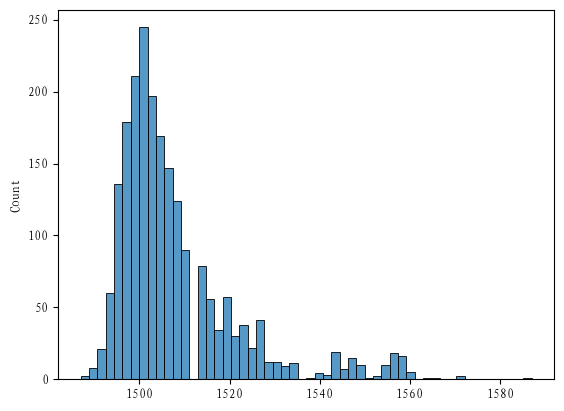

In [75]:
sns.histplot([len(x['instruction']) for x in all_data])

## 测试SFT模型效果

In [58]:
import os
import json
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from tqdm import tqdm
from sklearn.metrics import accuracy_score

def request_model(query, model="1022_category"):
    url = "http://localhost:9858/v1/chat/completions"

    headers = {
        "Content-Type": "application/json"
    }

    system_prompt = ""
    data = {
        "model": model,
        "messages": [
            {
                "role": "user",
                "content": query
            }
        ],
        "max_tokens": 1000,
        "temperature": 0
    }
    response = requests.post(url, headers=headers, data=json.dumps(data), timeout=6000)
    return response.json()['choices'][0]['message']['content'].strip()

print(gen_prompt(df, '中类名称', '土鸡蛋'))

请根据我提供的商品类别列表 ['粮食', '蔬菜', '水果', '坚果', '禽蛋', '食用盐', '食用油', '食糖', '肉类', '加工食品', '纺织产品', '救灾帐篷', '日用品', '简易厕所', '个人防护装备', '搜救设备', '医疗及防疫设备及常用应急药品', '应急运输与专用作业交通设备', '工程机械设备', '能源动力设备及物资', '应急照明设备及用品', '洗消器材及设备', '后勤支援装备', '非动力手工工具', '灭火及爆炸物处置设备', '拦污封堵器材装备', '泵类及通风排烟设备', '安防及反恐防暴装备', '分析检测类设备', '监测预警仪器和装置', '通信设备', '雷达、无线电导航及无线电遥控设备', '广播电视设备', '信号标识类器材', '信息技术设备', '工程材料', '机械加工设备']，对“土鸡蛋”进行准确分类。为了帮助你更好地理解分类标准，以下是每个类别的示例商品：

- 粮食：伊古道雪花小麦粉、三稻粱有机大豆
- 蔬菜：君和秀珍菇、金碧海碧海紫菜
- 水果：长武红17°24枚实惠装苹果、雪梅海乡芒果条
- 坚果：华盛老做坊裹衣花生、刻凡蒜香味青豆
- 禽蛋：欣欣农场杂粮土鸡蛋、洁龍酱汁味鹌鹑蛋
- 食用盐：三花加碘精制盐、中盐天山精纯盐
- 食用油：麦油郎非转基因一级大豆油、龙江和牛牛油
- 食糖：皓运莱绵白糖、红塘坊阿胶黑糖（食糖制品）
- 肉类：金牌无骨猪手、驼祥源酱鸵鸟肉
- 加工食品：元实担仔面、好麦多优选香辣味脆爽海带结
- 纺织产品：林翔强力大衣夹、非医用一次性隔离衣
- 救灾帐篷：CDREAM逐梦单层丛林帐篷、侣友（LEVORYEOU） 侣友户外更衣沐浴帐篷换衣服遮挡布
- 日用品：亨利雅十厘木纹勺、moimoin米色婴儿背带
- 简易厕所：炫铺移动厕所卫生间户外景区工地环保公厕公园露营、其他简易厕所
- 个人防护装备：京舰正压式消防空气呼吸器6L/6.8L钢瓶碳纤维呼吸器RHZ、医用一次性防护服套件
- 搜救设备：音频生命探测仪 幸存者进行搜寻并实现快速定位、玻璃棉卷毡批发 防火吸音隔热阻燃憎水保温毯
- 医疗及防疫设备及常用应急药品：VASSARETTE中国卫生应急伤情识别卡检伤分类卡验伤识别卡快速急救识别卡2 一套绿黄红黑4张、友牧兽用缝合针线宠物手术缝合线三棱针兽医器械

- end2end不给完整category_list的1%数据 

In [59]:
import json
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
from sklearn.metrics import accuracy_score

with open('category_SFT_test_end2end_1112.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

real_outputs = []
predicted_outputs = []

def process_item(item):
    instruction = item['instruction']
    response = request_model(instruction, model="1112_end2end_1")
    predicted_output = response.strip()
    return predicted_output, item['output']

with ThreadPoolExecutor(max_workers=200) as executor:
    futures = {executor.submit(process_item, item): item for item in data}

    for future in tqdm(as_completed(futures), total=len(futures), desc="Testing model"):
        predicted_output, real_output = future.result()
        real_outputs.append(real_output)
        predicted_outputs.append(predicted_output)

accuracy = accuracy_score(real_outputs, predicted_outputs)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

Testing model: 100%|██████████| 5781/5781 [01:24<00:00, 68.50it/s] 

Test Accuracy: 26.26%


- end2end不给完整category_list的10%数据 

In [60]:
real_outputs = []
predicted_outputs = []

def process_item(item):
    instruction = item['instruction']
    response = request_model(instruction, model="1112_end2end_10")
    predicted_output = response.strip()
    return predicted_output, item['output']

with ThreadPoolExecutor(max_workers=200) as executor:
    futures = {executor.submit(process_item, item): item for item in data}

    for future in tqdm(as_completed(futures), total=len(futures), desc="Testing model"):
        predicted_output, real_output = future.result()
        real_outputs.append(real_output)
        predicted_outputs.append(predicted_output)

accuracy = accuracy_score(real_outputs, predicted_outputs)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

Testing model: 100%|██████████| 5781/5781 [01:28<00:00, 65.05it/s] 

Test Accuracy: 74.05%


- end2end不给完整category_list的100%数据 

In [35]:
real_outputs = []
predicted_outputs = []

def process_item(item):
    instruction = item['instruction']
    response = request_model(instruction, model="1112_end2end")
    predicted_output = response.strip()
    return predicted_output, item['output']

with ThreadPoolExecutor(max_workers=200) as executor:
    futures = {executor.submit(process_item, item): item for item in data}

    for future in tqdm(as_completed(futures), total=len(futures), desc="Testing model"):
        predicted_output, real_output = future.result()
        real_outputs.append(real_output)
        predicted_outputs.append(predicted_output)

accuracy = accuracy_score(real_outputs, predicted_outputs)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

Testing model: 100%|██████████| 5781/5781 [01:36<00:00, 59.84it/s] 

Test Accuracy: 90.26%


- end2end给完整category_list的1%数据 

In [15]:
with open('category_SFT_test_end2end_category_list_1112.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

real_outputs = []
predicted_outputs = []

def process_item(item):
    instruction = item['instruction']
    response = request_model(instruction, model="1112_end2end_category_list_1")
    predicted_output = response.strip()
    return predicted_output, item['output']

with ThreadPoolExecutor(max_workers=100) as executor:
    futures = {executor.submit(process_item, item): item for item in data}

    for future in tqdm(as_completed(futures), total=len(futures), desc="Testing model"):
        predicted_output, real_output = future.result()
        real_outputs.append(real_output)
        predicted_outputs.append(predicted_output)

accuracy = accuracy_score(real_outputs, predicted_outputs)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

Testing model: 100%|██████████| 5781/5781 [15:50<00:00,  6.08it/s]

Test Accuracy: 15.12%


- end2end给完整category_list的10%数据 

In [17]:
real_outputs = []
predicted_outputs = []

def process_item(item):
    instruction = item['instruction']
    response = request_model(instruction, model="1112_end2end_category_list_10")
    predicted_output = response.strip()
    return predicted_output, item['output']

with ThreadPoolExecutor(max_workers=100) as executor:
    futures = {executor.submit(process_item, item): item for item in data}

    for future in tqdm(as_completed(futures), total=len(futures), desc="Testing model"):
        predicted_output, real_output = future.result()
        real_outputs.append(real_output)
        predicted_outputs.append(predicted_output)

accuracy = accuracy_score(real_outputs, predicted_outputs)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

Testing model: 100%|██████████| 5781/5781 [15:32<00:00,  6.20it/s]


Test Accuracy: 79.59%


- end2end给完整category_list的100%数据 

In [18]:
real_outputs = []
predicted_outputs = []

def process_item(item):
    instruction = item['instruction']
    response = request_model(instruction, model="1112_end2end_category_list")
    predicted_output = response.strip()
    return predicted_output, item['output']

with ThreadPoolExecutor(max_workers=100) as executor:
    futures = {executor.submit(process_item, item): item for item in data}

    for future in tqdm(as_completed(futures), total=len(futures), desc="Testing model"):
        predicted_output, real_output = future.result()
        real_outputs.append(real_output)
        predicted_outputs.append(predicted_output)

accuracy = accuracy_score(real_outputs, predicted_outputs)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

Testing model: 100%|██████████| 5781/5781 [15:32<00:00,  6.20it/s]

Test Accuracy: 90.36%


- 分级请求

In [61]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# all_test_data = [[], [], [], []]
# all_test_label = [[], [], [], []]

# for idx, row in tqdm(test_df.iterrows(), total=len(test_df)):
#     all_test_data[0].append(gen_prompt(df, '大类名称', row['产品名称']))
#     all_test_label.append(row['大类名称'])
#     all_test_data[1].append(gen_prompt(df, '中类名称', row['产品名称'], row['大类名称']))
#     all_test_label.append(row['中类名称'])
#     all_test_data[2].append(gen_prompt(df, '小类名称', row['产品名称'], row['中类名称']))
#     all_test_label.append(row['小类名称'])
#     all_test_data[3].append(gen_prompt(df, '细类名称', row['产品名称'], row['小类名称']))
#     all_test_label.append(row['细类名称'])

In [ ]:
# with open("split_test_data_all.json", "w+") as f:
#     json.dump(all_test_data, f, ensure_ascii=False)
    
# with open("split_test_data_all.json") as f:
#     all_test_label = json.load(f)

- split_level的1%的数据

In [ ]:
real_big_class = []
pred_big_class = []
real_middle_class = []
pred_middle_class = []
real_small_class = []
pred_small_class = []
real_fine_class = []
pred_fine_class = []

def process_item(idx):
    """
    对每个产品进行逐级预测，首先预测大类，然后预测中类，然后预测小类，最后预测细类
    """
    product_name = test_df.iloc[idx]['产品名称']
    true_big_class = test_df.iloc[idx]['大类名称']
    true_middle_class = test_df.iloc[idx]['中类名称']
    true_small_class = test_df.iloc[idx]['小类名称']
    true_fine_class = test_df.iloc[idx]['细类名称']

    # Step 1: 预测大类名称
    big_class_prompt = gen_prompt(df, '大类名称', product_name)
    big_class_response = request_model(big_class_prompt, model="1112_split_level_1").strip()

    real_big_class.append(true_big_class)
    pred_big_class.append(big_class_response)

    # 如果大类名称预测不正确，直接返回 False
    if big_class_response != true_big_class:
        return False

    # Step 2: 预测中类名称
    middle_class_prompt = gen_prompt(df, '中类名称', product_name, big_class_response)
    middle_class_response = request_model(middle_class_prompt, model="1112_split_level_1").strip()

    real_middle_class.append(true_middle_class)
    pred_middle_class.append(middle_class_response)

    # 如果中类名称预测不正确，直接返回 False
    if middle_class_response != true_middle_class:
        return False

    # Step 3: 预测小类名称
    small_class_prompt = gen_prompt(df, '小类名称', product_name, middle_class_response)
    small_class_response = request_model(small_class_prompt, model="1112_split_level_1").strip()

    real_small_class.append(true_small_class)
    pred_small_class.append(small_class_response)

    # 如果小类名称预测不正确，直接返回 False
    if small_class_response != true_small_class:
        return False

    # Step 4: 预测细类名称
    fine_class_prompt = gen_prompt(df, '细类名称', product_name, small_class_response)
    fine_class_response = request_model(fine_class_prompt, model="1112_split_level_1").strip()

    real_fine_class.append(true_fine_class)
    pred_fine_class.append(fine_class_response)

    return True

with ThreadPoolExecutor(max_workers=200) as executor:
    futures = {executor.submit(process_item, idx): idx for idx in range(len(test_df))}

    for future in tqdm(as_completed(futures), total=len(futures), desc="Testing model"):
        future.result()

# 大类名称评估
big_class_accuracy = accuracy_score(real_big_class, pred_big_class)
big_class_f1 = classification_report(real_big_class, pred_big_class)
big_class_confusion = confusion_matrix(real_big_class, pred_big_class)

print(f"大类名称 - 准确率: {big_class_accuracy * 100:.2f}%")
print("大类名称 - F1得分:")
print(big_class_f1)
print("大类名称 - 混淆矩阵:")
print(big_class_confusion)

# 中类名称评估
if len(real_middle_class) > 0:
    middle_class_accuracy = accuracy_score(real_middle_class, pred_middle_class)
    middle_class_f1 = classification_report(real_middle_class, pred_middle_class)
    middle_class_confusion = confusion_matrix(real_middle_class, pred_middle_class)

    print(f"\n中类名称 - 准确率: {middle_class_accuracy * 100:.2f}%")
    print("中类名称 - F1得分:")
    print(middle_class_f1)
    print("中类名称 - 混淆矩阵:")
    print(middle_class_confusion)

# 小类名称评估
if len(real_small_class) > 0:
    small_class_accuracy = accuracy_score(real_small_class, pred_small_class)
    small_class_f1 = classification_report(real_small_class, pred_small_class)
    small_class_confusion = confusion_matrix(real_small_class, pred_small_class)

    print(f"\n小类名称 - 准确率: {small_class_accuracy * 100:.2f}%")
    print("小类名称 - F1得分:")
    print(small_class_f1)
    print("小类名称 - 混淆矩阵:")
    print(small_class_confusion)

# 细类名称评估
if len(real_fine_class) > 0:
    fine_class_accuracy = accuracy_score(real_fine_class, pred_fine_class)
    fine_class_f1 = classification_report(real_fine_class, pred_fine_class)
    fine_class_confusion = confusion_matrix(real_fine_class, pred_fine_class)

    print(f"\n细类名称 - 准确率: {fine_class_accuracy * 100:.2f}%")
    print("细类名称 - F1得分:")
    print(fine_class_f1)
    print("细类名称 - 混淆矩阵:")
    print(fine_class_confusion)

Testing model:   7%|▋         | 418/5944 [01:44<02:57, 31.18it/s]  

In [ ]:
print(f"\n分级下真正的大类名称 - 准确率: {big_class_accuracy * 100:.2f}%")
print(f"\n分级下真正的中类名称 - 准确率: {middle_class_accuracy / len(real_big_class) * len(real_middle_class)* 100:.2f}%")
print(f"\n分级下真正的小类名称 - 准确率: {small_class_accuracy / len(real_big_class) * len(real_small_class) * 100:.2f}%")
print(f"\n分级下真正的细类名称 - 准确率: {fine_class_accuracy / len(real_big_class) * len(real_fine_class) * 100:.2f}%")


分级下真正的大类名称 - 准确率: 90.71%

分级下真正的中类名称 - 准确率: 65.73%

分级下真正的小类名称 - 准确率: 64.86%

分级下真正的细类名称 - 准确率: 59.92%


- split_level的10%数据

In [17]:
real_big_class = []
pred_big_class = []
real_middle_class = []
pred_middle_class = []
real_small_class = []
pred_small_class = []
real_fine_class = []
pred_fine_class = []

def process_item(idx):
    """
    对每个产品进行逐级预测，首先预测大类，然后预测中类，然后预测小类，最后预测细类
    """
    product_name = test_df.iloc[idx]['产品名称']
    true_big_class = test_df.iloc[idx]['大类名称']
    true_middle_class = test_df.iloc[idx]['中类名称']
    true_small_class = test_df.iloc[idx]['小类名称']
    true_fine_class = test_df.iloc[idx]['细类名称']

    # Step 1: 预测大类名称
    big_class_prompt = gen_prompt(df, '大类名称', product_name)
    big_class_response = request_model(big_class_prompt, model="1112_split_level_10").strip()

    real_big_class.append(true_big_class)
    pred_big_class.append(big_class_response)

    # 如果大类名称预测不正确，直接返回 False
    if big_class_response != true_big_class:
        return False

    # Step 2: 预测中类名称
    middle_class_prompt = gen_prompt(df, '中类名称', product_name, big_class_response)
    middle_class_response = request_model(middle_class_prompt, model="1112_split_level_10").strip()

    real_middle_class.append(true_middle_class)
    pred_middle_class.append(middle_class_response)

    # 如果中类名称预测不正确，直接返回 False
    if middle_class_response != true_middle_class:
        return False

    # Step 3: 预测小类名称
    small_class_prompt = gen_prompt(df, '小类名称', product_name, middle_class_response)
    small_class_response = request_model(small_class_prompt, model="1112_split_level_10").strip()

    real_small_class.append(true_small_class)
    pred_small_class.append(small_class_response)

    # 如果小类名称预测不正确，直接返回 False
    if small_class_response != true_small_class:
        return False

    # Step 4: 预测细类名称
    fine_class_prompt = gen_prompt(df, '细类名称', product_name, small_class_response)
    fine_class_response = request_model(fine_class_prompt, model="1112_split_level_10").strip()

    real_fine_class.append(true_fine_class)
    pred_fine_class.append(fine_class_response)

    return True

with ThreadPoolExecutor(max_workers=200) as executor:
    futures = {executor.submit(process_item, idx): idx for idx in range(len(test_df))}

    for future in tqdm(as_completed(futures), total=len(futures), desc="Testing model"):
        future.result()

# 大类名称评估
big_class_accuracy = accuracy_score(real_big_class, pred_big_class)
big_class_f1 = classification_report(real_big_class, pred_big_class)
big_class_confusion = confusion_matrix(real_big_class, pred_big_class)

print(f"大类名称 - 准确率: {big_class_accuracy * 100:.2f}%")
print("大类名称 - F1得分:")
print(big_class_f1)
print("大类名称 - 混淆矩阵:")
print(big_class_confusion)

# 中类名称评估
if len(real_middle_class) > 0:
    middle_class_accuracy = accuracy_score(real_middle_class, pred_middle_class)
    middle_class_f1 = classification_report(real_middle_class, pred_middle_class)
    middle_class_confusion = confusion_matrix(real_middle_class, pred_middle_class)

    print(f"\n中类名称 - 准确率: {middle_class_accuracy * 100:.2f}%")
    print("中类名称 - F1得分:")
    print(middle_class_f1)
    print("中类名称 - 混淆矩阵:")
    print(middle_class_confusion)

# 小类名称评估
if len(real_small_class) > 0:
    small_class_accuracy = accuracy_score(real_small_class, pred_small_class)
    small_class_f1 = classification_report(real_small_class, pred_small_class)
    small_class_confusion = confusion_matrix(real_small_class, pred_small_class)

    print(f"\n小类名称 - 准确率: {small_class_accuracy * 100:.2f}%")
    print("小类名称 - F1得分:")
    print(small_class_f1)
    print("小类名称 - 混淆矩阵:")
    print(small_class_confusion)

# 细类名称评估
if len(real_fine_class) > 0:
    fine_class_accuracy = accuracy_score(real_fine_class, pred_fine_class)
    fine_class_f1 = classification_report(real_fine_class, pred_fine_class)
    fine_class_confusion = confusion_matrix(real_fine_class, pred_fine_class)

    print(f"\n细类名称 - 准确率: {fine_class_accuracy * 100:.2f}%")
    print("细类名称 - F1得分:")
    print(fine_class_f1)
    print("细类名称 - 混淆矩阵:")
    print(fine_class_confusion)

Testing model: 100%|██████████| 5944/5944 [07:00<00:00, 14.14it/s]
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

大类名称 - 准确率: 97.31%
大类名称 - F1得分:
              precision    recall  f1-score   support

    基本生活保障物资       0.98      1.00      0.99      4199
 工程材料与机械加工设备       0.74      0.78      0.76        96
   应急装备及配套物资       0.98      0.93      0.95      1649

    accuracy                           0.97      5944
   macro avg       0.90      0.90      0.90      5944
weighted avg       0.97      0.97      0.97      5944

大类名称 - 混淆矩阵:
[[4179    1   19]
 [   4   75   17]
 [  94   25 1530]]

中类名称 - 准确率: 92.10%
中类名称 - F1得分:
                  precision    recall  f1-score   support

          个人防护装备       0.93      0.92      0.93       381
         信号标识类器材       0.69      0.96      0.80        25
          信息技术设备       0.66      0.89      0.76        56
         分析检测类设备       0.66      0.78      0.71       156
          办公办公用品       0.00      0.00      0.00         0
            加工食品       0.97      0.97      0.97       950
  医疗及防疫设备及常用应急药品       0.80      0.95      0.87       342
          后勤支援装备     

/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/e

In [18]:
print(f"\n分级下真正的大类名称 - 准确率: {big_class_accuracy * 100:.2f}%")
print(f"\n分级下真正的中类名称 - 准确率: {middle_class_accuracy / len(real_big_class) * len(real_middle_class)* 100:.2f}%")
print(f"\n分级下真正的小类名称 - 准确率: {small_class_accuracy / len(real_big_class) * len(real_small_class) * 100:.2f}%")
print(f"\n分级下真正的细类名称 - 准确率: {fine_class_accuracy / len(real_big_class) * len(real_fine_class) * 100:.2f}%")


分级下真正的大类名称 - 准确率: 97.31%

分级下真正的中类名称 - 准确率: 89.62%

分级下真正的小类名称 - 准确率: 84.17%

分级下真正的细类名称 - 准确率: 79.59%


- split_level的100%数据

In [16]:
real_big_class = []
pred_big_class = []
real_middle_class = []
pred_middle_class = []
real_small_class = []
pred_small_class = []
real_fine_class = []
pred_fine_class = []

def process_item(idx):
    """
    对每个产品进行逐级预测，首先预测大类，然后预测中类，然后预测小类，最后预测细类
    """
    product_name = test_df.iloc[idx]['产品名称']
    true_big_class = test_df.iloc[idx]['大类名称']
    true_middle_class = test_df.iloc[idx]['中类名称']
    true_small_class = test_df.iloc[idx]['小类名称']
    true_fine_class = test_df.iloc[idx]['细类名称']

    # Step 1: 预测大类名称
    big_class_prompt = gen_prompt(df, '大类名称', product_name)
    big_class_response = request_model(big_class_prompt, model="1112_split_level").strip()

    real_big_class.append(true_big_class)
    pred_big_class.append(big_class_response)

    # 如果大类名称预测不正确，直接返回 False
    if big_class_response != true_big_class:
        return False

    # Step 2: 预测中类名称
    middle_class_prompt = gen_prompt(df, '中类名称', product_name, big_class_response)
    middle_class_response = request_model(middle_class_prompt, model="1112_split_level").strip()

    real_middle_class.append(true_middle_class)
    pred_middle_class.append(middle_class_response)

    # 如果中类名称预测不正确，直接返回 False
    if middle_class_response != true_middle_class:
        return False

    # Step 3: 预测小类名称
    small_class_prompt = gen_prompt(df, '小类名称', product_name, middle_class_response)
    small_class_response = request_model(small_class_prompt, model="1112_split_level").strip()

    real_small_class.append(true_small_class)
    pred_small_class.append(small_class_response)

    # 如果小类名称预测不正确，直接返回 False
    if small_class_response != true_small_class:
        return False

    # Step 4: 预测细类名称
    fine_class_prompt = gen_prompt(df, '细类名称', product_name, small_class_response)
    fine_class_response = request_model(fine_class_prompt, model="1112_split_level").strip()

    real_fine_class.append(true_fine_class)
    pred_fine_class.append(fine_class_response)

    return True

with ThreadPoolExecutor(max_workers=200) as executor:
    futures = {executor.submit(process_item, idx): idx for idx in range(len(test_df))}

    for future in tqdm(as_completed(futures), total=len(futures), desc="Testing model"):
        future.result()

# 大类名称评估
big_class_accuracy = accuracy_score(real_big_class, pred_big_class)
big_class_f1 = classification_report(real_big_class, pred_big_class)
big_class_confusion = confusion_matrix(real_big_class, pred_big_class)

print(f"大类名称 - 准确率: {big_class_accuracy * 100:.2f}%")
print("大类名称 - F1得分:")
print(big_class_f1)
print("大类名称 - 混淆矩阵:")
print(big_class_confusion)

# 中类名称评估
if len(real_middle_class) > 0:
    middle_class_accuracy = accuracy_score(real_middle_class, pred_middle_class)
    middle_class_f1 = classification_report(real_middle_class, pred_middle_class)
    middle_class_confusion = confusion_matrix(real_middle_class, pred_middle_class)

    print(f"\n中类名称 - 准确率: {middle_class_accuracy * 100:.2f}%")
    print("中类名称 - F1得分:")
    print(middle_class_f1)
    print("中类名称 - 混淆矩阵:")
    print(middle_class_confusion)

# 小类名称评估
if len(real_small_class) > 0:
    small_class_accuracy = accuracy_score(real_small_class, pred_small_class)
    small_class_f1 = classification_report(real_small_class, pred_small_class)
    small_class_confusion = confusion_matrix(real_small_class, pred_small_class)

    print(f"\n小类名称 - 准确率: {small_class_accuracy * 100:.2f}%")
    print("小类名称 - F1得分:")
    print(small_class_f1)
    print("小类名称 - 混淆矩阵:")
    print(small_class_confusion)

# 细类名称评估
if len(real_fine_class) > 0:
    fine_class_accuracy = accuracy_score(real_fine_class, pred_fine_class)
    fine_class_f1 = classification_report(real_fine_class, pred_fine_class)
    fine_class_confusion = confusion_matrix(real_fine_class, pred_fine_class)

    print(f"\n细类名称 - 准确率: {fine_class_accuracy * 100:.2f}%")
    print("细类名称 - F1得分:")
    print(fine_class_f1)
    print("细类名称 - 混淆矩阵:")
    print(fine_class_confusion)

Testing model: 100%|██████████| 5944/5944 [29:01<00:00,  3.41it/s]  
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


大类名称 - 准确率: 92.92%
大类名称 - F1得分:
              precision    recall  f1-score   support

    基本生活保障物资       0.95      0.97      0.96      4199
 工程材料与机械加工设备       0.53      0.52      0.52        96
   应急装备及配套物资       0.90      0.84      0.87      1649

    accuracy                           0.93      5944
   macro avg       0.79      0.78      0.78      5944
weighted avg       0.93      0.93      0.93      5944

大类名称 - 混淆矩阵:
[[4084    0  115]
 [   3   50   43]
 [ 215   45 1389]]

中类名称 - 准确率: 96.89%
中类名称 - F1得分:
                  precision    recall  f1-score   support

          个人防护装备       0.96      0.94      0.95       342
         信号标识类器材       0.86      0.96      0.91        25
          信息技术设备       0.89      0.91      0.90        55
         分析检测类设备       0.91      0.94      0.93       153
            加工食品       0.99      0.99      0.99       952
  医疗及防疫设备及常用应急药品       0.96      0.94      0.95       276
          后勤支援装备       0.92      0.90      0.91        39
              坚果     

/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/e

In [18]:
print(f"\n分级下真正的大类名称 - 准确率: {big_class_accuracy * 100:.2f}%")
print(f"\n分级下真正的中类名称 - 准确率: {middle_class_accuracy / len(real_big_class) * len(real_middle_class)* 100:.2f}%")
print(f"\n分级下真正的小类名称 - 准确率: {small_class_accuracy / len(real_big_class) * len(real_small_class) * 100:.2f}%")
print(f"\n分级下真正的细类名称 - 准确率: {fine_class_accuracy / len(real_big_class) * len(real_fine_class) * 100:.2f}%")


分级下真正的大类名称 - 准确率: 92.92%

分级下真正的中类名称 - 准确率: 90.02%

分级下真正的小类名称 - 准确率: 88.31%

分级下真正的细类名称 - 准确率: 85.92%


## 测试基模型效果
- glm4-9b

In [19]:
import json
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
from sklearn.metrics import accuracy_score

with open('category_SFT_test_end2end_1112.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

real_outputs = []
predicted_outputs = []

def process_item(item):
    instruction = item['instruction']
    response = request_model(instruction, model="glm-4-9b-chat")
    predicted_output = response.strip()
    return predicted_output, item['output']

with ThreadPoolExecutor(max_workers=200) as executor:
    futures = {executor.submit(process_item, item): item for item in data}

    for future in tqdm(as_completed(futures), total=len(futures), desc="Testing model"):
        predicted_output, real_output = future.result()
        real_outputs.append(real_output)
        predicted_outputs.append(predicted_output)

accuracy = accuracy_score(real_outputs, predicted_outputs)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

Testing model: 100%|██████████| 5781/5781 [01:41<00:00, 57.13it/s] 

Test Accuracy: 2.68%


In [ ]:
import json
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
from sklearn.metrics import accuracy_score

with open('category_SFT_test_end2end_category_list_1112.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

real_outputs = []
predicted_outputs = []

def process_item(item):
    instruction = item['instruction']
    response = request_model(instruction, model="glm-4-9b-chat")
    predicted_output = response.strip()
    return predicted_output, item['output']

with ThreadPoolExecutor(max_workers=200) as executor:
    futures = {executor.submit(process_item, item): item for item in data}

    for future in tqdm(as_completed(futures), total=len(futures), desc="Testing model"):
        predicted_output, real_output = future.result()
        real_outputs.append(real_output)
        predicted_outputs.append(predicted_output)

accuracy = accuracy_score(real_outputs, [x.replace("- ", "").strip() for x in predicted_outputs])

print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 10.97%


In [29]:
real_big_class = []
pred_big_class = []
real_middle_class = []
pred_middle_class = []
real_small_class = []
pred_small_class = []
real_fine_class = []
pred_fine_class = []

def process_item(idx):
    """
    对每个产品进行逐级预测，首先预测大类，然后预测中类，然后预测小类，最后预测细类
    """
    product_name = test_df.iloc[idx]['产品名称']
    true_big_class = test_df.iloc[idx]['大类名称']
    true_middle_class = test_df.iloc[idx]['中类名称']
    true_small_class = test_df.iloc[idx]['小类名称']
    true_fine_class = test_df.iloc[idx]['细类名称']

    # Step 1: 预测大类名称
    big_class_prompt = gen_prompt(df, '大类名称', product_name)
    big_class_response = request_model(big_class_prompt, model="glm-4-9b-chat").strip()

    real_big_class.append(true_big_class)
    pred_big_class.append(big_class_response)

    # 如果大类名称预测不正确，直接返回 False
    if big_class_response != true_big_class:
        return False

    # Step 2: 预测中类名称
    middle_class_prompt = gen_prompt(df, '中类名称', product_name, big_class_response)
    middle_class_response = request_model(middle_class_prompt, model="glm-4-9b-chat").strip()

    real_middle_class.append(true_middle_class)
    pred_middle_class.append(middle_class_response)

    # 如果中类名称预测不正确，直接返回 False
    if middle_class_response != true_middle_class:
        return False

    # Step 3: 预测小类名称
    small_class_prompt = gen_prompt(df, '小类名称', product_name, middle_class_response)
    small_class_response = request_model(small_class_prompt, model="glm-4-9b-chat").strip()

    real_small_class.append(true_small_class)
    pred_small_class.append(small_class_response)

    # 如果小类名称预测不正确，直接返回 False
    if small_class_response != true_small_class:
        return False

    # Step 4: 预测细类名称
    fine_class_prompt = gen_prompt(df, '细类名称', product_name, small_class_response)
    fine_class_response = request_model(fine_class_prompt, model="glm-4-9b-chat").strip()

    real_fine_class.append(true_fine_class)
    pred_fine_class.append(fine_class_response)

    return True

with ThreadPoolExecutor(max_workers=200) as executor:
    futures = {executor.submit(process_item, idx): idx for idx in range(len(test_df))}

    for future in tqdm(as_completed(futures), total=len(futures), desc="Testing model"):
        future.result()

# 大类名称评估
big_class_accuracy = accuracy_score(real_big_class, pred_big_class)
big_class_f1 = classification_report(real_big_class, pred_big_class)
big_class_confusion = confusion_matrix(real_big_class, pred_big_class)

print(f"大类名称 - 准确率: {big_class_accuracy * 100:.2f}%")
print("大类名称 - F1得分:")
print(big_class_f1)
print("大类名称 - 混淆矩阵:")
print(big_class_confusion)

# 中类名称评估
if len(real_middle_class) > 0:
    middle_class_accuracy = accuracy_score(real_middle_class, pred_middle_class)
    middle_class_f1 = classification_report(real_middle_class, pred_middle_class)
    middle_class_confusion = confusion_matrix(real_middle_class, pred_middle_class)

    print(f"\n中类名称 - 准确率: {middle_class_accuracy * 100:.2f}%")
    print("中类名称 - F1得分:")
    print(middle_class_f1)
    print("中类名称 - 混淆矩阵:")
    print(middle_class_confusion)

# 小类名称评估
if len(real_small_class) > 0:
    small_class_accuracy = accuracy_score(real_small_class, pred_small_class)
    small_class_f1 = classification_report(real_small_class, pred_small_class)
    small_class_confusion = confusion_matrix(real_small_class, pred_small_class)

    print(f"\n小类名称 - 准确率: {small_class_accuracy * 100:.2f}%")
    print("小类名称 - F1得分:")
    print(small_class_f1)
    print("小类名称 - 混淆矩阵:")
    print(small_class_confusion)

# 细类名称评估
if len(real_fine_class) > 0:
    fine_class_accuracy = accuracy_score(real_fine_class, pred_fine_class)
    fine_class_f1 = classification_report(real_fine_class, pred_fine_class)
    fine_class_confusion = confusion_matrix(real_fine_class, pred_fine_class)

    print(f"\n细类名称 - 准确率: {fine_class_accuracy * 100:.2f}%")
    print("细类名称 - F1得分:")
    print(fine_class_f1)
    print("细类名称 - 混淆矩阵:")
    print(fine_class_confusion)

Testing model: 100%|██████████| 5944/5944 [06:16<00:00, 15.80it/s]
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{met

大类名称 - 准确率: 84.62%
大类名称 - F1得分:
                                            precision    recall  f1-score   support

                                  基本生活保障物资       0.91      0.99      0.95      4199
                               工程材料与机械加工设备       0.14      0.78      0.24        96
                                 应急装备及配套物资       0.97      0.48      0.64      1649
户外文旅拓展设备网红吊索桥 游乐园耐防腐木板桥 历奇探险生产加工

基本生活保障物资       0.00      0.00      0.00         0
                                      无法分类       0.00      0.00      0.00         0
                                      无法确定       0.00      0.00      0.00         0

                                  accuracy                           0.85      5944
                                 macro avg       0.34      0.38      0.30      5944
                              weighted avg       0.91      0.85      0.85      5944

大类名称 - 混淆矩阵:
[[4165    8   24    0    1    1]
 [  17   75    4    0    0    0]
 [ 418  440  790    1    0    0]
 [   0    0  

/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/e

In [30]:
print(f"\n分级下真正的大类名称 - 准确率: {big_class_accuracy * 100:.2f}%")
print(f"\n分级下真正的中类名称 - 准确率: {middle_class_accuracy / len(real_big_class) * len(real_middle_class)* 100:.2f}%")
print(f"\n分级下真正的小类名称 - 准确率: {small_class_accuracy / len(real_big_class) * len(real_small_class) * 100:.2f}%")
print(f"\n分级下真正的细类名称 - 准确率: {fine_class_accuracy / len(real_big_class) * len(real_fine_class) * 100:.2f}%")


分级下真正的大类名称 - 准确率: 84.62%

分级下真正的中类名称 - 准确率: 70.52%

分级下真正的小类名称 - 准确率: 58.50%

分级下真正的细类名称 - 准确率: 54.27%


- qwen2.5 7b

In [16]:
real_big_class = []
pred_big_class = []
real_middle_class = []
pred_middle_class = []
real_small_class = []
pred_small_class = []
real_fine_class = []
pred_fine_class = []

def process_item(idx):
    """
    对每个产品进行逐级预测，首先预测大类，然后预测中类，然后预测小类，最后预测细类
    """
    product_name = test_df.iloc[idx]['产品名称']
    true_big_class = test_df.iloc[idx]['大类名称']
    true_middle_class = test_df.iloc[idx]['中类名称']
    true_small_class = test_df.iloc[idx]['小类名称']
    true_fine_class = test_df.iloc[idx]['细类名称']

    # Step 1: 预测大类名称
    big_class_prompt = gen_prompt(df, '大类名称', product_name)
    big_class_response = request_model(big_class_prompt, model="Qwen2.5-7B-Instruct").strip()

    real_big_class.append(true_big_class)
    pred_big_class.append(big_class_response)

    # 如果大类名称预测不正确，直接返回 False
    if big_class_response != true_big_class:
        return False

    # Step 2: 预测中类名称
    middle_class_prompt = gen_prompt(df, '中类名称', product_name, big_class_response)
    middle_class_response = request_model(middle_class_prompt, model="Qwen2.5-7B-Instruct").strip()

    real_middle_class.append(true_middle_class)
    pred_middle_class.append(middle_class_response)

    # 如果中类名称预测不正确，直接返回 False
    if middle_class_response != true_middle_class:
        return False

    # Step 3: 预测小类名称
    small_class_prompt = gen_prompt(df, '小类名称', product_name, middle_class_response)
    small_class_response = request_model(small_class_prompt, model="Qwen2.5-7B-Instruct").strip()

    real_small_class.append(true_small_class)
    pred_small_class.append(small_class_response)

    # 如果小类名称预测不正确，直接返回 False
    if small_class_response != true_small_class:
        return False

    # Step 4: 预测细类名称
    fine_class_prompt = gen_prompt(df, '细类名称', product_name, small_class_response)
    fine_class_response = request_model(fine_class_prompt, model="Qwen2.5-7B-Instruct").strip()

    real_fine_class.append(true_fine_class)
    pred_fine_class.append(fine_class_response)

    return True

with ThreadPoolExecutor(max_workers=200) as executor:
    futures = {executor.submit(process_item, idx): idx for idx in range(len(test_df))}

    for future in tqdm(as_completed(futures), total=len(futures), desc="Testing model"):
        future.result()

# 大类名称评估
big_class_accuracy = accuracy_score(real_big_class, pred_big_class)
big_class_f1 = classification_report(real_big_class, pred_big_class)
big_class_confusion = confusion_matrix(real_big_class, pred_big_class)

print(f"大类名称 - 准确率: {big_class_accuracy * 100:.2f}%")
print("大类名称 - F1得分:")
print(big_class_f1)
print("大类名称 - 混淆矩阵:")
print(big_class_confusion)

# 中类名称评估
if len(real_middle_class) > 0:
    middle_class_accuracy = accuracy_score(real_middle_class, pred_middle_class)
    middle_class_f1 = classification_report(real_middle_class, pred_middle_class)
    middle_class_confusion = confusion_matrix(real_middle_class, pred_middle_class)

    print(f"\n中类名称 - 准确率: {middle_class_accuracy * 100:.2f}%")
    print("中类名称 - F1得分:")
    print(middle_class_f1)
    print("中类名称 - 混淆矩阵:")
    print(middle_class_confusion)

# 小类名称评估
if len(real_small_class) > 0:
    small_class_accuracy = accuracy_score(real_small_class, pred_small_class)
    small_class_f1 = classification_report(real_small_class, pred_small_class)
    small_class_confusion = confusion_matrix(real_small_class, pred_small_class)

    print(f"\n小类名称 - 准确率: {small_class_accuracy * 100:.2f}%")
    print("小类名称 - F1得分:")
    print(small_class_f1)
    print("小类名称 - 混淆矩阵:")
    print(small_class_confusion)

# 细类名称评估
if len(real_fine_class) > 0:
    fine_class_accuracy = accuracy_score(real_fine_class, pred_fine_class)
    fine_class_f1 = classification_report(real_fine_class, pred_fine_class)
    fine_class_confusion = confusion_matrix(real_fine_class, pred_fine_class)

    print(f"\n细类名称 - 准确率: {fine_class_accuracy * 100:.2f}%")
    print("细类名称 - F1得分:")
    print(fine_class_f1)
    print("细类名称 - 混淆矩阵:")
    print(fine_class_confusion)

Testing model: 100%|██████████| 5944/5944 [06:03<00:00, 16.33it/s] 
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

大类名称 - 准确率: 87.33%
大类名称 - F1得分:
                                                       precision    recall  f1-score   support

           RBA验厂所需文件 降低质量损失 赢得客户的信任对应的商品类别是：基本生活保障物资。       0.00      0.00      0.00         0
                                               中药学实训室       0.00      0.00      0.00         0
                                企业公司行政设备办公用品资产入库盘点管理软       0.00      0.00      0.00         0
                                                 办公用品       0.00      0.00      0.00         0
                                             基本生活保障物资       0.95      0.96      0.95      4199
               基本生活保障物资；应急装备及配套物资；应急装备及配套物资；应急装备及配套物资       0.00      0.00      0.00         0
                                          工程材料与机械加工设备       0.19      0.83      0.30        96
                                            应急装备及配套物资       0.88      0.65      0.75      1649
           应急装备及配套物资
工程材料与机械加工设备
工程材料与机械加工设备
基本生活保障物资       0.00      0.00      0.00         0
                 

/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/py


中类名称 - 准确率: 82.43%
中类名称 - F1得分:
                                                                                                                                             precision    recall  f1-score   support

                                                                                                                                     个人防护装备       0.86      0.71      0.78       319
                                                                                                                                    信号标识类器材       0.83      0.20      0.32        25
                                                                                                                                     信息技术设备       0.70      0.40      0.51        35
                                                                                                            储能电气柜自动灭火设备对应的商品类别是“应急照明设备及用品”。       0.00      0.00      0.00         0
                                                             

/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/e

In [35]:
print(f"\n分级下真正的大类名称 - 准确率: {big_class_accuracy * 100:.2f}%")
print(f"\n分级下真正的中类名称 - 准确率: {middle_class_accuracy / len(real_big_class) * len(real_middle_class)* 100:.2f}%")
print(f"\n分级下真正的小类名称 - 准确率: {small_class_accuracy / len(real_big_class) * len(real_small_class) * 100:.2f}%")
print(f"\n分级下真正的细类名称 - 准确率: {fine_class_accuracy / len(real_big_class) * len(real_fine_class) * 100:.2f}%")

分级下真正的大类名称 - 准确率: 85.67%

分级下真正的中类名称 - 准确率: 70.18%

分级下真正的小类名称 - 准确率: 55.91%

分级下真正的细类名称 - 准确率: 49.32%


- llama3 8b

In [26]:
real_big_class = []
pred_big_class = []
real_middle_class = []
pred_middle_class = []
real_small_class = []
pred_small_class = []
real_fine_class = []
pred_fine_class = []

def process_item(idx):
    """
    对每个产品进行逐级预测，首先预测大类，然后预测中类，然后预测小类，最后预测细类
    """
    product_name = test_df.iloc[idx]['产品名称']
    true_big_class = test_df.iloc[idx]['大类名称']
    true_middle_class = test_df.iloc[idx]['中类名称']
    true_small_class = test_df.iloc[idx]['小类名称']
    true_fine_class = test_df.iloc[idx]['细类名称']

    # Step 1: 预测大类名称
    big_class_prompt = gen_prompt(df, '大类名称', product_name)
    big_class_response = request_model(big_class_prompt, model="Meta-Llama-3-8B-Instruct").strip()

    real_big_class.append(true_big_class)
    pred_big_class.append(big_class_response)

    # 如果大类名称预测不正确，直接返回 False
    if big_class_response != true_big_class:
        return False

    # Step 2: 预测中类名称
    middle_class_prompt = gen_prompt(df, '中类名称', product_name, big_class_response)
    middle_class_response = request_model(middle_class_prompt, model="Meta-Llama-3-8B-Instruct").strip()

    real_middle_class.append(true_middle_class)
    pred_middle_class.append(middle_class_response)

    # 如果中类名称预测不正确，直接返回 False
    if middle_class_response != true_middle_class:
        return False

    # Step 3: 预测小类名称
    small_class_prompt = gen_prompt(df, '小类名称', product_name, middle_class_response)
    small_class_response = request_model(small_class_prompt, model="Meta-Llama-3-8B-Instruct").strip()

    real_small_class.append(true_small_class)
    pred_small_class.append(small_class_response)

    # 如果小类名称预测不正确，直接返回 False
    if small_class_response != true_small_class:
        return False

    # Step 4: 预测细类名称
    fine_class_prompt = gen_prompt(df, '细类名称', product_name, small_class_response)
    fine_class_response = request_model(fine_class_prompt, model="Meta-Llama-3-8B-Instruct").strip()

    real_fine_class.append(true_fine_class)
    pred_fine_class.append(fine_class_response)

    return True

with ThreadPoolExecutor(max_workers=200) as executor:
    futures = {executor.submit(process_item, idx): idx for idx in range(len(test_df))}

    for future in tqdm(as_completed(futures), total=len(futures), desc="Testing model"):
        future.result()

# 大类名称评估
big_class_accuracy = accuracy_score(real_big_class, pred_big_class)
big_class_f1 = classification_report(real_big_class, pred_big_class)
big_class_confusion = confusion_matrix(real_big_class, pred_big_class)

print(f"大类名称 - 准确率: {big_class_accuracy * 100:.2f}%")
print("大类名称 - F1得分:")
print(big_class_f1)
print("大类名称 - 混淆矩阵:")
print(big_class_confusion)

# 中类名称评估
if len(real_middle_class) > 0:
    middle_class_accuracy = accuracy_score(real_middle_class, pred_middle_class)
    middle_class_f1 = classification_report(real_middle_class, pred_middle_class)
    middle_class_confusion = confusion_matrix(real_middle_class, pred_middle_class)

    print(f"\n中类名称 - 准确率: {middle_class_accuracy * 100:.2f}%")
    print("中类名称 - F1得分:")
    print(middle_class_f1)
    print("中类名称 - 混淆矩阵:")
    print(middle_class_confusion)

# 小类名称评估
if len(real_small_class) > 0:
    small_class_accuracy = accuracy_score(real_small_class, pred_small_class)
    small_class_f1 = classification_report(real_small_class, pred_small_class)
    small_class_confusion = confusion_matrix(real_small_class, pred_small_class)

    print(f"\n小类名称 - 准确率: {small_class_accuracy * 100:.2f}%")
    print("小类名称 - F1得分:")
    print(small_class_f1)
    print("小类名称 - 混淆矩阵:")
    print(small_class_confusion)

# 细类名称评估
if len(real_fine_class) > 0:
    fine_class_accuracy = accuracy_score(real_fine_class, pred_fine_class)
    fine_class_f1 = classification_report(real_fine_class, pred_fine_class)
    fine_class_confusion = confusion_matrix(real_fine_class, pred_fine_class)

    print(f"\n细类名称 - 准确率: {fine_class_accuracy * 100:.2f}%")
    print("细类名称 - F1得分:")
    print(fine_class_f1)
    print("细类名称 - 混淆矩阵:")
    print(fine_class_confusion)

Testing model: 100%|██████████| 5944/5944 [05:48<00:00, 17.04it/s]
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{met

大类名称 - 准确率: 85.01%
大类名称 - F1得分:
                                                                                                                                                                                                                                    precision    recall  f1-score   support

                                                                                                                                                                                                                     "工程材料与机械加工设备"       0.00      0.00      0.00         0
                                                                                                                                                                                                              "采样剪刀"属于 "应急装备及配套物资"       0.00      0.00      0.00         0
                                                                                                                                                                   

/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/e


中类名称 - 准确率: 67.19%
中类名称 - F1得分:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/envs/qwen2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/anconda3/e

In [27]:
print(f"\n分级下真正的大类名称 - 准确率: {big_class_accuracy * 100:.2f}%")
print(f"\n分级下真正的中类名称 - 准确率: {middle_class_accuracy / len(real_big_class) * len(real_middle_class)* 100:.2f}%")
print(f"\n分级下真正的小类名称 - 准确率: {small_class_accuracy / len(real_big_class) * len(real_small_class) * 100:.2f}%")
print(f"\n分级下真正的细类名称 - 准确率: {fine_class_accuracy / len(real_big_class) * len(real_fine_class) * 100:.2f}%")


分级下真正的大类名称 - 准确率: 85.01%

分级下真正的中类名称 - 准确率: 57.12%

分级下真正的小类名称 - 准确率: 42.70%

分级下真正的细类名称 - 准确率: 39.70%


## 汇总结果

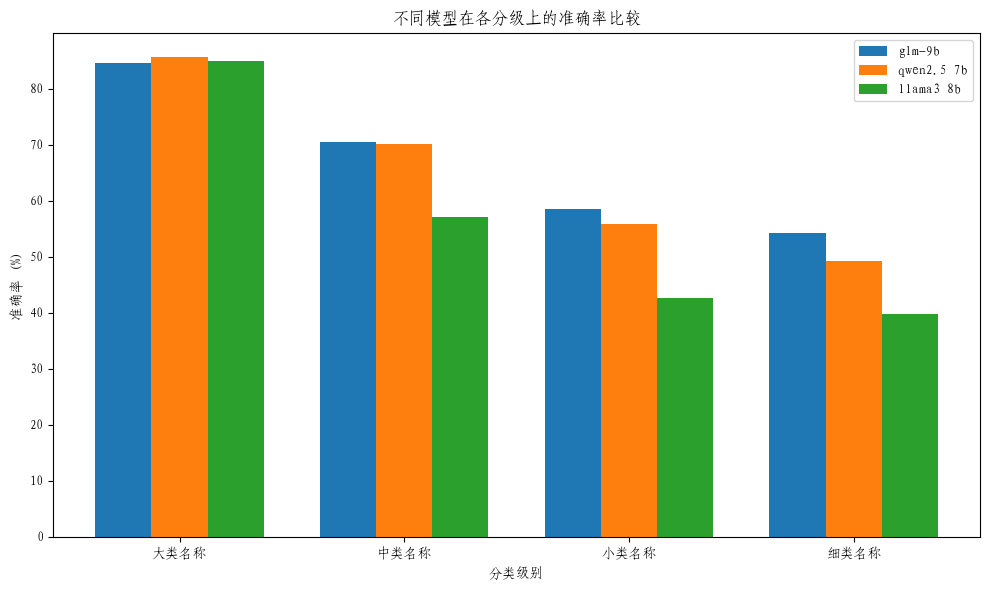

In [36]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['大类名称', '中类名称', '小类名称', '细类名称']
glm_9b = [84.62, 70.52, 58.50, 54.27]
qwen_2_5_7b = [85.67, 70.18, 55.91, 49.32]
llama3_8b = [85.01, 57.12, 42.70, 39.70]

bar_width = 0.25
x = np.arange(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, glm_9b, width=bar_width, label='glm-9b')
plt.bar(x, qwen_2_5_7b, width=bar_width, label='qwen2.5 7b')
plt.bar(x + bar_width, llama3_8b, width=bar_width, label='llama3 8b')

plt.xticks(x, categories)
plt.xlabel('分类级别')
plt.ylabel('准确率 (%)')
plt.title('不同模型在各分级上的准确率比较')
plt.legend()

plt.tight_layout()
plt.show()

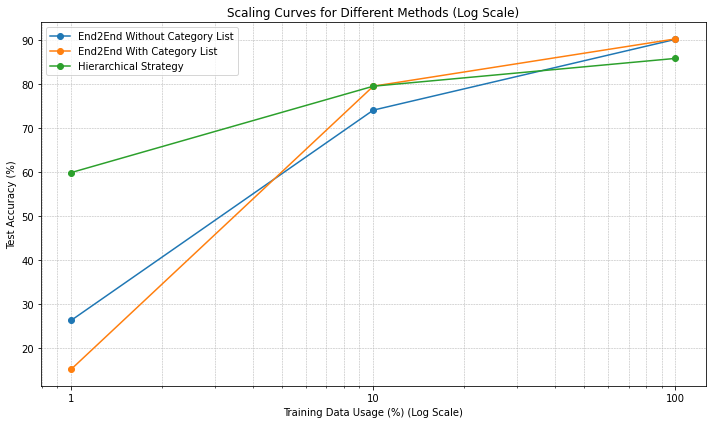

In [19]:
import matplotlib.pyplot as plt
import numpy as np

train_data_percentage = [1, 10, 100]

end2end_no_category = [26.26, 74.14, 90.26]
end2end_with_category = [15.12, 79.59, 90.36]
hierarchical_strategy = [59.92, 79.59, 85.92]

plt.figure(figsize=(10, 6))

plt.plot(train_data_percentage, end2end_no_category, marker='o', label='End2End Without Category List')
plt.plot(train_data_percentage, end2end_with_category, marker='o', label='End2End With Category List')
plt.plot(train_data_percentage, hierarchical_strategy, marker='o', label='Hierarchical Strategy')

plt.xscale('log')

plt.xlabel('Training Data Usage (%) (Log Scale)')
plt.ylabel('Test Accuracy (%)')
plt.title('Scaling Curves for Different Methods (Log Scale)')
plt.xticks(train_data_percentage, labels=train_data_percentage)
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()
